In [26]:
# matplotlib設定用コート
# matplotlibに描画する度に（, fontproperties=font）引数を指定する。
# なぜか設定ファイルはきかない。。。
import os
from matplotlib import pyplot as plt, font_manager

font_manager._rebuild()
font_dir = font_manager.win32FontDirectory()
font_path = os.path.join(font_dir, 'SourceHanCodeJP-Regular.otf')
font = font_manager.FontProperties(fname=font_path, size=14)

In [1]:
# 青空文庫のデータ読み出しスクリプト
# ルビなどのタグ情報を削除するAozora.pyファイルを使う。
from aozora import Aozora
aozora = Aozora('D:/1.programming/python/PythonTextMining/Data/773_ruby_5968/kokoro.txt')
for u in aozora.read():
    print(u)

こころ
夏目漱石


上　先生と私


一

　私はその人を常に先生と呼んでいた。だからここでもただ先生と書くだけで本名は打ち明けない。これは世間を憚かる遠慮というよりも、その方が私にとって自然だからである。私はその人の記憶を呼び起すごとに、すぐ「先生」といいたくなる。筆を執っても心持は同じ事である。よそよそしい頭文字などはとても使う気にならない。
　私が先生と知り合いになったのは鎌倉である。その時私はまだ若々しい書生であった。暑中休暇を利用して海水浴に行った友達からぜひ来いという端書を受け取ったので、私は多少の金を工面して、出掛ける事にした。私は金の工面に二、三日を費やした。ところが私が鎌倉に着いて三日と経たないうちに、私を呼び寄せた友達は、急に国元から帰れという電報を受け取った。電報には母が病気だからと断ってあったけれども友達はそれを信じなかった。友達はかねてから国元にいる親たちに勧まない結婚を強いられていた。彼は現代の習慣からいうと結婚するにはあまり年が若過ぎた。それに肝心の当人が気に入らなかった。それで夏休みに当然帰るべきところを、わざと避けて東京の近くで遊んでいたのである。彼は電報を私に見せてどうしようと相談をした。私にはどうしていいか分らなかった。けれども実際彼の母が病気であるとすれば彼は固より帰るべきはずであった。それで彼はとうとう帰る事になった。せっかく来た私は一人取り残された。
　学校の授業が始まるにはまだ大分日数があるので鎌倉におってもよし、帰ってもよいという境遇にいた私は、当分元の宿に留まる覚悟をした。友達は中国のある資産家の息子で金に不自由のない男であったけれども、学校が学校なのと年が年なので、生活の程度は私とそう変りもしなかった。したがって一人ぼっちになった私は別に恰好な宿を探す面倒ももたなかったのである。
　宿は鎌倉でも辺鄙な方角にあった。玉突きだのアイスクリームだのというハイカラなものには長い畷を一つ越さなければ手が届かなかった。車で行っても二十銭は取られた。けれども個人の別荘はそこここにいくつでも建てられていた。それに海へはごく近いので海水浴をやるには至極便利な地位を占めていた。
　私は毎日海へはいりに出掛けた。古い燻ぶり返った藁葺の間を通り抜けて磯へ下りると、この辺にこれほどの都会人種が住んでいるかと思うほど、避暑に来た男や女で砂の


二十五

　その年の六月に卒業するはずの私は、ぜひともこの論文を成規通り四月いっぱいに書き上げてしまわなければならなかった。二、三、四と指を折って余る時日を勘定して見た時、私は少し自分の度胸を疑った。他のものはよほど前から材料を蒐めたり、ノートを溜めたりして、余所目にも忙しそうに見えるのに、私だけはまだ何にも手を着けずにいた。私にはただ年が改まったら大いにやろうという決心だけがあった。私はその決心でやり出した。そうして忽ち動けなくなった。今まで大きな問題を空に描いて、骨組みだけはほぼでき上っているくらいに考えていた私は、頭を抑えて悩み始めた。私はそれから論文の問題を小さくした。そうして練り上げた思想を系統的に纏める手数を省くために、ただ書物の中にある材料を並べて、それに相当な結論をちょっと付け加える事にした。
　私の選択した問題は先生の専門と縁故の近いものであった。私がかつてその選択について先生の意見を尋ねた時、先生は好いでしょうといった。狼狽した気味の私は、早速先生の所へ出掛けて、私の読まなければならない参考書を聞いた。先生は自分の知っている限りの知識を、快く私に与えてくれた上に、必要の書物を、二、三冊貸そうといった。しかし先生はこの点について毫も私を指導する任に当ろうとしなかった。
「近頃はあんまり書物を読まないから、新しい事は知りませんよ。学校の先生に聞いた方が好いでしょう」
　先生は一時非常の読書家であったが、その後どういう訳か、前ほどこの方面に興味が働かなくなったようだと、かつて奥さんから聞いた事があるのを、私はその時ふと思い出した。私は論文をよそにして、そぞろに口を開いた。
「先生はなぜ元のように書物に興味をもち得ないんですか」
「なぜという訳もありませんが。……つまりいくら本を読んでもそれほどえらくならないと思うせいでしょう。それから……」
「それから、まだあるんですか」
「まだあるというほどの理由でもないが、以前はね、人の前へ出たり、人に聞かれたりして知らないと恥のようにきまりが悪かったものだが、近頃は知らないという事が、それほどの恥でないように見え出したものだから、つい無理にも本を読んでみようという元気が出なくなったのでしょう。まあ早くいえば老い込んだのです」
　先生の言葉はむしろ平静であった。世間に背中を向けた人の苦味を帯びていなかっただけに、

　私はとうとう万世橋を渡って、明神の坂を上がって、本郷台へ来て、それからまた菊坂を下りて、しまいに小石川の谷へ下りたのです。私の歩いた距離はこの三区に跨がって、いびつな円を描いたともいわれるでしょうが、私はこの長い散歩の間ほとんどＫの事を考えなかったのです。今その時の私を回顧して、なぜだと自分に聞いてみても一向分りません。ただ不思議に思うだけです。私の心がＫを忘れ得るくらい、一方に緊張していたとみればそれまでですが、私の良心がまたそれを許すべきはずはなかったのですから。
　Ｋに対する私の良心が復活したのは、私が宅の格子を開けて、玄関から坐敷へ通る時、すなわち例のごとく彼の室を抜けようとした瞬間でした。彼はいつもの通り机に向って書見をしていました。彼はいつもの通り書物から眼を放して、私を見ました。しかし彼はいつもの通り今帰ったのかとはいいませんでした。彼は「病気はもう癒いのか、医者へでも行ったのか」と聞きました。私はその刹那に、彼の前に手を突いて、詫まりたくなったのです。しかも私の受けたその時の衝動は決して弱いものではなかったのです。もしＫと私がたった二人曠野の真中にでも立っていたならば、私はきっと良心の命令に従って、その場で彼に謝罪したろうと思います。しかし奥には人がいます。私の自然はすぐそこで食い留められてしまったのです。そうして悲しい事に永久に復活しなかったのです。
　夕飯の時Ｋと私はまた顔を合せました。何にも知らないＫはただ沈んでいただけで、少しも疑い深い眼を私に向けません。何にも知らない奥さんはいつもより嬉しそうでした。私だけがすべてを知っていたのです。私は鉛のような飯を食いました。その時お嬢さんはいつものようにみんなと同じ食卓に並びませんでした。奥さんが催促すると、次の室で只今と答えるだけでした。それをＫは不思議そうに聞いていました。しまいにどうしたのかと奥さんに尋ねました。奥さんは大方極りが悪いのだろうといって、ちょっと私の顔を見ました。Ｋはなお不思議そうに、なんで極りが悪いのかと追窮しに掛かりました。奥さんは微笑しながらまた私の顔を見るのです。
　私は食卓に着いた初めから、奥さんの顔付で、事の成行をほぼ推察していました。しかしＫに説明を与えるために、私のいる前で、それを悉く話されては堪らないと考えました。奥さんはまたそのくらいの事を平気でする女なのです

### MeCab（IPA辞書）をWindowsに入れるためにやったことリスト
1. MeCabのインストール
 - 参考ＵＲＬ：[http://memopy.blogspot.jp/2017/11/pythonwindowsmecab.html]
 - 64bit版(mecab-0.996-64.exe)のインストール：[https://github.com/ikegami-yukino/mecab/releases]
 - UTF-8を選択。（そうしないと、ファイルの入出力による操作がきかなくなると思われる。）
 - 生成される「\sdk」直下を「C:\Program Files (x86)\MeCab\sdk」へコピー。（これを設定して動いたので、多分かなり重要。）
1. Pathを通す
 - 「コントロールパネル」の「システムの詳細設定」から「環境変数」を設定できる。
 - 「Path」に「C:\MeCab\bin」 を追加。
 - 後からpython連携させるときに必要なので「MECABRC」に「C:\MeCab\etc\mecabrc」も追加。
1. Visual Studioのインストール
 - Visual Studio 2017 Communityを入れた。[https://www.visualstudio.com/ja/thank-you-downloading-visual-studio/?sku=Community&rel=15]
 - C++を使える環境があれば、やらなくてもよい？
1. pip install mecab-python-windows
 - 参考ＵＲＬ：[https://qiita.com/yukinoi/items/990b6933d9f21ba0fb43]

上記の内、重要なのは①、④。場合によっては②③は省略できるのかも。
- 本家ＵＲＬ：[http://taku910.github.io/mecab/]


In [4]:
# MeCabによる形態素解析
from aozora import Aozora
import re
import MeCab
import numpy as np
import matplotlib.pyplot as plt

m = MeCab.Tagger("-Ochasen")
out = m.parse("すもももももももものうち")

xlist = [u.split() for u in m.parse("すもももももももものうち").splitlines()]

xlist

[['すもも', 'スモモ', 'すもも', '名詞-一般'],
 ['も', 'モ', 'も', '助詞-係助詞'],
 ['もも', 'モモ', 'もも', '名詞-一般'],
 ['も', 'モ', 'も', '助詞-係助詞'],
 ['もも', 'モモ', 'もも', '名詞-一般'],
 ['の', 'ノ', 'の', '助詞-連体化'],
 ['うち', 'ウチ', 'うち', '名詞-非自立-副詞可能'],
 ['EOS']]

average 25.55
variance 130.8475
std-deviation 11.438859208854701
6
7
7
13
16
19
20
22
23
28
28
30
30
32
33
35
35
38
43
46


D:\0.programs\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['IPAGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


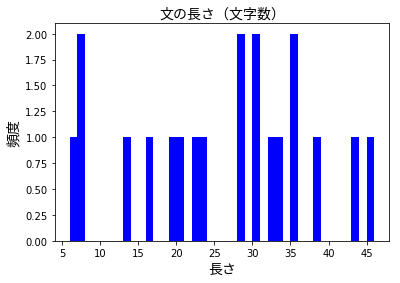

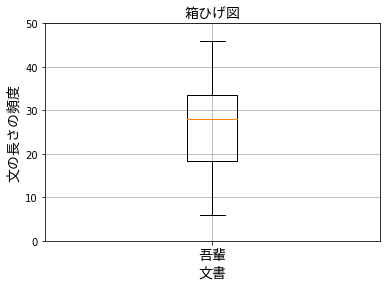

In [38]:
# -*- coding: utf-8 -*-
# リスト 3-3 『吾輩は猫である』を単語に分解し、単語数の分布のヒストグラム・箱ひげ図を描くプログラム
# なお、まったくMecabを使う理由は見当たらない。lengthlistだけで十分
from aozora import Aozora
import re
import MeCab
import numpy as np
import matplotlib.pyplot as plt
aozora = Aozora("wagahaiwa_nekodearu.txt") #Aozoraクラスのインスタンスを作る。
 
# 文に分解する
string = '\n'.join(aozora.read()) #正規表現で置換するために文字列に直す。
# string = re.sub('　', '', string) #' 'を除外する。ただ、個人的には下1行のみで十分だと思う。
string = re.split('。(?!」)|\n', re.sub('　', '', string)) #改行キーを参考にリスト化する。
while '' in string:  string.remove('')  # 空行を除く
#m = MeCab.Tagger("-Ochasen")            # MeCabで品詞分解する
 
# 先頭20文について文単位で形態素解析し、名詞だけ抽出して、基本形を文ごとのリストにする
lengthlist = np.array( [len(v) for v in string][3:23] ) #先頭20文の文字量を計算する。
print('average', lengthlist.mean())
print('variance', lengthlist.var())
print('std-deviation', lengthlist.std())
#for u in lengthlist: print(u)           # それぞれの文の長さを、出現順に表示。見づらいのでコメントアウトする。
for u in sorted(lengthlist): print(u)   # それぞれの文の長さを、長さ順に表示

#plt.rcParams['font.family'] = 'IPAGothic'
fig = plt.figure()
plt.title('文の長さ（文字数）', fontproperties=font)
plt.xlabel('長さ', fontproperties=font)
plt.ylabel('頻度', fontproperties=font)
plt.hist(lengthlist, color='blue', bins=40)  # binsでヒストグラムの横軸区分数を指定 
plt.show()

# 箱ひげ図を作る
plt.boxplot(lengthlist)
plt.xticks([1], ['吾輩'], fontproperties=font)
plt.title('箱ひげ図', fontproperties=font)
plt.grid()
plt.xlabel('文書', fontproperties=font)
plt.ylabel('文の長さの頻度', fontproperties=font)
plt.ylim([0,50])
plt.show()


### 潜在的意味解析モデル
- gensimモジュール

In [1]:
# -*- coding: utf-8 -*-
# リスト 2-7  潜在的意味解析モデルを使って話題を抽出するプログラム例
# LSALDAやWord2Vec等のライブラリを含むgensim
# 細かい説明は以下参照。http://hivecolor.com/id/58
from gensim import corpora, models, similarities
# textsをあらかじめ準備しておく（分かち書き文のリスト）
num_topics = 3
documents = ["Human machine interface for lab abc computer applications",
             "A survey of user opinion of computer system response time",
             "The EPS user interface management system",
             "System and human system engineering testing of EPS",
             "Relation of user perceived response time to error measurement",
             "The generation of random binary unordered trees",
             "The intersection graph of paths in trees",
             "Graph minors IV Widths of trees and well quasi ordering",
             "Graph minors A survey"]
stoplist = set('for a of the and to in'.split()) #集合を手っ取り早く創りたい時、この書き方意外と役立つかも。
#分かち書きに相当する処理。stoplistsの形態素は無視する。
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in documents]
# remove words that appear only once
# 空リスト[]にtextsのリストを足して、tokensをまとめる。
all_tokens = sum(texts, [])
#set(all_tokens) #typeを出したいとき
tokens_once = set(word for word in set(all_tokens) if all_tokens.count(word) == 1)
texts = [[word for word in text if word not in tokens_once]
         for text in texts]

dictionary = corpora.Dictionary(texts)  # 入力textsリストをdictionaryに変換。トークンをまとめる。
#dictionary.save_as_text('./dictionary.dict') #dictionaryをテキストファイルに書き出し。
corpus = [dictionary.doc2bow(text) for text in texts]  # corpusを作成
#tfidfの計算方法は以下参照。http://tawara.hatenablog.com/entry/2016/11/08/021408
tfidf = models.TfidfModel(corpus)       # TFIDFモデルを作成
corpus_tfidf = tfidf[corpus]            # corpusをTF-IDFで重要語のみに変換
lsi = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=num_topics)
                                        # corpus_tfidfからLSIモデルを作成
# トピックの表示
print(lsi.show_topics(num_topics, formatted=True))     # topicを表示
corpus_lsi = lsi[corpus_tfidf]          # corpus_tfidfのすべての文をLSIに変換
for doc in corpus_lsi:
    x = [ sorted(doc, key=lambda u: u[1], reverse=True) for u in doc if len(u)!=0]
    print(x)

D:\0.programs\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


[(0, '0.703*"trees" + 0.538*"graph" + 0.402*"minors" + 0.187*"survey" + 0.061*"system" + 0.060*"response" + 0.060*"time" + 0.058*"user" + 0.049*"computer" + 0.035*"interface"'), (1, '0.460*"system" + 0.373*"user" + 0.332*"eps" + 0.328*"interface" + 0.320*"response" + 0.320*"time" + 0.293*"computer" + 0.280*"human" + 0.171*"survey" + -0.161*"trees"'), (2, '0.456*"time" + 0.456*"response" + -0.352*"eps" + -0.340*"human" + -0.318*"interface" + -0.277*"system" + 0.272*"survey" + 0.213*"user" + -0.183*"trees" + 0.114*"minors"')]
[[(1, 0.5200703306361845), (0, 0.06600783396090529), (2, -0.37649581219168893)], [(1, 0.5200703306361845), (0, 0.06600783396090529), (2, -0.37649581219168893)], [(1, 0.5200703306361845), (0, 0.06600783396090529), (2, -0.37649581219168893)]]
[[(1, 0.7609563167700035), (2, 0.5080674581001661), (0, 0.19667592859142588)], [(1, 0.7609563167700035), (2, 0.5080674581001661), (0, 0.19667592859142588)], [(1, 0.7609563167700035), (2, 0.5080674581001661), (0, 0.196675928591425

In [40]:
# corpusの見方
# dictionary.doc2bow(text)でcorpusが纏められる。
# 入力したtextがdictionaryにあるかどうかチェックする。なければ無視される。
# あれば (dictionaryのID, 出現回数) の形でまとめられる。
corpus

[[(0, 1), (1, 1), (2, 1)],
 [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(2, 1), (5, 1), (7, 1), (8, 1)],
 [(1, 1), (5, 2), (8, 1)],
 [(3, 1), (6, 1), (7, 1)],
 [(9, 1)],
 [(9, 1), (10, 1)],
 [(9, 1), (10, 1), (11, 1)],
 [(4, 1), (10, 1), (11, 1)]]

### 自然言語処理
- NLTKモジュール

In [8]:
# 自然言語処理のパッケージNLTK
# ダウンロードしたいコーパス等を選ぶ。
# 基本はCollcetionstタブのbookをダウンロードすればよい。
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
# -*- coding: utf-8 -*-
# 2.5.2節  NLTK に含まれるコーパスデータ　　NTLKのデータを表示する
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [4]:
# 中身を表示する。
for u in text7:
    print(u, end=' ')
    if u=='.':
        print()

Pierre Vinken , 61 years old , will join the board as a nonexecutive director Nov. 29 . 
Mr. Vinken is chairman of Elsevier N.V. , the Dutch publishing group . 
Rudolph Agnew , 55 years old and former chairman of Consolidated Gold Fields PLC , was named *-1 a nonexecutive director of this British industrial conglomerate . 
A form of asbestos once used * * to make Kent cigarette filters has caused a high percentage of cancer deaths among a group of workers exposed * to it more than 30 years ago , researchers reported 0 *T*-1 . 
The asbestos fiber , crocidolite , is unusually resilient once it enters the lungs , with even brief exposures to it causing symptoms that *T*-1 show up decades later , researchers said 0 *T*-2 . 
Lorillard Inc. , the unit of New York-based Loews Corp. that *T*-2 makes Kent cigarettes , stopped using crocidolite in its Micronite cigarette filters in 1956 . 
Although preliminary findings were reported *-2 more than a year ago , the latest results appear in today '

Preliminary tallies by the Trade and Industry Ministry showed another trade deficit in October , the fifth monthly setback this year , * casting a cloud on South Korea 's export-oriented economy . 
Exports in October stood at $ 5.29 billion *U* , a mere 0.7 % increase from a year earlier , while imports increased sharply to $ 5.39 billion *U* , up 20 % from last October . 
South Korea 's economic boom , which *T*-12 began in 1986 , stopped this year because of prolonged labor disputes , trade conflicts and sluggish exports . 
Government officials said 0 exports at the end of the year would remain under a government target of $ 68 billion *U* . 
Despite the gloomy forecast , South Korea has recorded a trade surplus of $ 71 million *U* so far this year . 
From January to October , the nation 's accumulated exports increased 4 % from the same period last year to $ 50.45 billion *U* . 
Imports were at $ 50.38 billion *U* , up 19 % . 
Newsweek , *-1 trying *-2 to keep pace with rival Time m

October sales , compared * with the previous month , inched down 0.4 % . 
Sales of passenger cars grew 22 % from a year earlier to 361,376 units . 
Sales of medium-sized cars , which *T*-21 benefited from price reductions arising from introduction of the consumption tax , more than doubled to 30,841 units from 13,056 in October 1988 . 
Texas Instruments Japan Ltd. , a unit of Texas Instruments Inc. , said 0 it opened a plant *ICH*-3 in South Korea 0 *T*-2 to manufacture control devices . 
The new plant , located * in Chinchon about 60 miles from Seoul , will help *-2 meet increasing and diversifying demand for control products in South Korea , the company said 0 *T*-1 . 
The plant will produce control devices used * in motor vehicles and household appliances . 
The survival of spinoff Cray Computer Corp. as a fledgling in the supercomputer business appears *-1 to depend heavily on the creativity -- and longevity -- of its chairman and chief designer , Seymour Cray . 
Not only is develo

So far , Mrs. Hills has n't deemed any cases bad enough *-1 to merit an accelerated investigation under the so-called special 301 provision of the act . 
Argentina said 0 it will ask creditor banks *-1 to halve its foreign debt of $ 64 billion *U* -- the third-highest in the developing world . 
The declaration by Economy Minister Nestor Rapanelli is believed *-1 to be the first time 0 such an action has been called for *-3 by an Argentine official of such stature *T*-2 . 
The Latin American nation has paid very little on its debt since early last year . 
`` Argentina aspires *-2 to reach a reduction of 50 % in the value of its external debt , '' Mr. Rapanelli said *T*-1 through his spokesman , Miguel Alurralde . 
Mr. Rapanelli met in August with U.S. Assistant Treasury Secretary David Mulford . 
Argentine negotiator Carlos Carballo was in Washington and New York this week *-1 to meet with banks . 
Mr. Rapanelli recently has said 0 the government of President Carlos Menem , who *T*-29 t

The offer is being launched *-45 pursuant to a previously announced agreement between the companies . 
Japan 's reserves of gold , convertible foreign currencies , and special drawing rights fell by a hefty $ 1.82 billion *U* in October to $ 84.29 billion *U* , the Finance Ministry said 0 *T*-2 . 
The total marks the sixth consecutive monthly decline . 
The protracted downturn reflects the intensity of Bank of Japan yen-support intervention since June , when the U.S. currency temporarily surged above the 150.00 yen level *T*-1 . 
The announcement follows a sharper $ 2.2 billion *U* decline in the country 's foreign reserves in September to $ 86.12 billion *U* . 
* Pick a country , any country . 
It 's the latest investment craze sweeping Wall Street : a rash of new closed-end country funds , those publicly traded portfolios that *T*-37 invest in stocks of a single foreign country . 
No fewer than 24 country funds *ICH*-1 have been launched *-2 or registered *-2 with regulators this yea

In its construction spending report , the Commerce Department said 0 residential construction , which *T*-50 accounts for nearly half of all construction spending , was off 0.9 % *ICH*-3 in September to an annual rate of $ 191.9 billion *U* . 
David Berson , economist for the Mortgage Bankers Association , predicted 0 the drop in interest rates eventually will boost spending on single-family homes , but probably not until early next year . 
Spending on private , nonresidential construction was off 2.6 % to an annual rate of $ 99.1 billion *U* with no sector showing strength . 
Government construction spending rose 4.3 % to $ 88 billion *U* . 
After *-1 adjusting for inflation , the Commerce Department said 0 construction spending did n't change in September . 
For the first nine months of the year , total construction spending ran about 2 % above last year 's level . 
The government 's construction spending figures contrast with a report issued * earlier in the week by McGraw-Hill Inc.

A marketing study indicates that Hong Kong consumers are the most materialistic in the 14 major markets where the survey was carried out *T*-1 . 
The study by the Backer Spielvogel Bates ad agency also found that the colony 's consumers feel more pressured than those in any of the other surveyed markets , which *T*-60 include the U.S. and Japan . 
The survey found that nearly half of Hong Kong consumers espouse what it identified *T*-61 as materialistic values , compared with about one-third in Japan and the U.S. . 
More than three in five said 0 they are under a great deal of stress most of the time , compared with less than one in two U.S. consumers and one in four in Japan . 
The Thai cabinet endorsed Finance Minister Pramual Sabhavasu 's proposal * to build a $ 19 million *U* conference center for a joint meeting of the World Bank and International Monetary Fund two years from now . 
The meeting , which *T*-62 is expected *-1 to draw 20,000 to Bangkok , was going *-2 to be held *-6

Video Tip : Before *-1 seeing `` Sidewalk Stories , '' * take a look at `` City Lights , '' Chaplin 's Tramp at his finest . 
Boeing Co. said 0 it is discussing plans *ICH*-1 with three of its regular Japanese suppliers * to possibly help *-2 build a larger version of its popular 767 twin-jet . 
The discussions are still in preliminary stages , and the specific details have n't been worked *-2 out between the Seattle aerospace company and Kawasaki Heavy Industries Ltd. , Mitsubishi Heavy Industries Ltd. and Fuji Heavy Industries Ltd . 
The three Japanese companies build the body sections of the 767 , *-1 accounting for a combined 15 % of the aircraft . 
Japanese press reports have speculated that the Japanese contribution could rise to between 20 % and 25 % *U* under the new program . 
If Boeing goes ahead with the larger 767 , the plane could hit the market in the mid-1990s . 
This is the year 0 the negative ad , for years a secondary presence in most political campaigns , became the 

The record price for a full membership on the exchange is $ 550,000 *U* , *-2 set *-1 Aug. 31 , 1987 . 
Japanese investment in Southeast Asia is propelling the region toward economic integration . 
Interviews with analysts and business people in the U.S. suggest that Japanese capital may produce the economic cooperation that Southeast Asian politicians have pursued *T*-2 in fits and starts for decades . 
But Japan 's power in the region also is sparking fears of domination and posing fresh policy questions . 
The flow of Japanese funds has set in motion `` a process whereby these economies will be knitted *-1 together by the great Japanese investment machine *T*-2 , '' says 0 *T*-3 Robert Hormats , vice chairman of Goldman Sachs International Corp . 
In the past five years , Japanese companies have tripled their commitments in Asia to $ 5.57 billion *U* . 
In Thailand , for example , the government 's Board of Investment approved $ 705.6 million *U* of Japanese investment *ICH*-1 in 19

Use of Scoring High is widespread in South Carolina and common in Greenville County , Mrs. Yeargin 's school district . 
Experts say 0 there is n't another state in the country where tests mean as much as they do *?* in South Carolina *T*-1 . 
Under the state 's Education Improvement Act , low test scores can block students ' promotions or force entire districts into wrenching , state-supervised `` interventions '' that *T*-86 can mean firings . 
High test scores , on the other hand , bring recognition and extra money -- a new computer lab for a school , grants for special projects , a bonus for the superintendent . 
And South Carolina says 0 it is getting results . 
Since the reforms went in place , for example , no state has posted a higher rate of improvement on the Scholastic Aptitude Test than South Carolina *?* , although the state still posts the lowest average score of the about 21 states who *T*-87 use the SAT as the primary college entrance examination . 
Critics say 0 South 

Editorials in the Greenville newspaper allowed that Mrs. Yeargin was wrong , but also said 0 the case showed how testing was being overused *-2 *T*-1 . 
The radio show `` enraged us , '' says *T*-1 Mrs. Ward . 
Partly because of the show , Mr. Watson says 0 *T*-1 , the district decided not *-2 to recommend Mrs. Yeargin for a first-time offenders program that *T*-99 could have expunged the charges and the conviction from her record . 
And legal authorities cranked up an investigation worthy of a murder case . 
Over 50 witnesses , mostly students , were interviewed *-1 . 
At Greenville High School , meanwhile , some students -- especially on the cheerleading squad -- were crushed *-1 . 
`` It *EXP*-1 's hard * to explain to a 17-year-old why someone 0 they like *T*-2 had *-3 to go , '' says *T*-4 Mrs. Ward . 
Soon , T-shirts *ICH*-1 appeared in the corridors that *T*-2 carried the school 's familiar red-and-white GHS logo on the front . 
On the back , the shirts read , `` We have all the

But the administration 's handling of the fetal-tissue transplant issue disturbs many scientists . 
`` When scientific progress moves into uncharted ground *T*-1 , there has *-3 to be a role *ICH*-4 for society * to make judgments about its applications , '' says *T*-2 Myron Genel , associate dean of the Yale Medical School . 
`` The disturbing thing about this abortion issue is that the debate has become polarized *-1 , so that no mechanism *ICH*-2 exists '' for * finding a middle ground . 
Yale is one of the few medical institutions conducting privately funded research on fetal-tissue transplants . 
But Dr. Genel warns that Dr. Mason 's ruling may discourage private funding . 
`` The unavailability of federal funds , and the climate in which the decision was made *-2 *T*-1 , certainly do n't provide any incentive for one of the more visible foundations to provide support , '' he said *T*-3 . 
Despite the flap over transplants , federal funding of research involving fetal tissues will

But in the letters sent * in recent days , Christopher J. Lezovich of the IRS computing center in Detroit , told attorneys that `` * failing *-1 to voluntarily submit the requested information could result in summons enforcement action being initiated *-2 . 
'' In some cases , the IRS asked for information dating back to forms 0 it received *T*-1 in 1985 . 
A spokesman for the IRS confirmed that `` there has been correspondence mailed * about incomplete 8300s , '' but he declined *-1 to say why the letters were sent *-2 to lawyers now . 
Individuals familiar with the Justice Department 's policy said that Justice officials had n't any knowledge of the IRS 's actions in the last week . 
Lawyers worry that if they provide information about clients , that data could quickly end up in the hands of prosecutors . 
Prosecutors need court permission *-1 to obtain the tax returns of an individual or a business . 
But they have obtained 8300 forms without court permission and used the informatio

The U.S. government in recent years has accused Japanese companies of * excessively slashing prices on semiconductors and supercomputers -- products 0 Fujitsu and NEC make *T*-1 . 
*-1 Asked *-2 whether the bidding flap would hurt U.S.-Japan relations , Mr. Yamamoto said , `` this will be a minus factor . 
'' The `` one-yen '' controversy first came to a head last week when the city of Hiroshima announced that Fujitsu won a contract * to design a computer system 0 *T*-2 to map its waterworks *T*-1 . 
The city had expected *-1 to pay about 11 million yen -LRB- $ 77,000 *U* -RRB- , but Fujitsu essentially offered *-2 to do it for free . 
Then Wednesday , Fujitsu said 0 it made a similar bid *-1 to win a library contract in Nagano prefecture two weeks earlier . 
It also said that in July , it bid 10,000 yen *-2 to design a system for the Saitama prefectural library , and two years ago , it bid one yen *-1 to plan the telecommunications system for Wakayama prefecture . 
The company said 0 

The reruns have helped ratings at many of the 187 network affiliates and independent TV stations that *T*-150 air the shows . 
But the ratings are considerably below expectations , and some stations say 0 they may not buy new episodes when their current contracts expire *T*-1 . 
Meanwhile , stations are fuming because , many of them say 0 *T*-1 , the show 's distributor , Viacom Inc. , is giving an ultimatum : * Either sign new long-term commitments * to buy future episodes or risk *-2 losing `` Cosby '' to a competitor . 
At the same time , Viacom is trying *-1 to persuade stations *-2 to make commitments to `` A Different World , '' a spin-off of `` Cosby '' whose reruns *T*-151 will become available in 1991 . 
Viacom denies 0 it 's using pressure tactics . 
`` We 're willing *-2 to negotiate , '' says *T*-1 Dennis Gillespie , executive vice president of marketing . 
`` We 're offering this plan now because we feel 0 it 's the right time . 
'' But , says 0 *T*-1 the general manager o

About $ 490 million *U* of that would be allocated *-87 to the buy-back , * leaving about $ 130 million *U* , he said 0 *T*-1 . 
That $ 130 million *U* , Mr. Sherwood said 0 *T*-1 , `` gives us some flexibility in case Temple raises its bid . 
We are able *-2 to increase our price above the $ 70 *U* level if necessary . 
'' He declined *-2 to say , however , how much Sea Containers might raise its price *T*-1 . 
Mr. Sherwood speculated that the leeway that Sea Containers has *T*-1 means that Temple would have *-2 to `` substantially increase their bid if they 're going *-3 to top us . 
'' Temple , however , harshly criticized Sea Containers ' plan yesterday , *-1 characterizing it as a `` highly conditional device designed * *-2 to entrench management , confuse shareholders and prevent them from *-3 accepting our superior cash offer . 
'' A spokesman for Temple estimated that Sea Containers ' plan -- if all the asset sales materialize -- would result in shareholders receiving only $ 36

For years , this group included a stable of classics -- Bordeaux first growths -LRB- Lafite-Rothschild , Latour , Haut-Brion , Petrus -RRB- , Grand Cru Burgundies -LRB- Romanee-Conti and La Tache -RRB- deluxe Champagnes -LRB- Dom Perignon or Roederer Cristal -RRB- , rarefied sweet wines -LRB- Chateau Yquem or Trockenbeerenauslesen Rieslings from Germany , and Biondi-Santi Brunello Riserva from Tuscany -RRB- . 
These first magnitude wines ranged in price from $ 40 *U* *RNR*-1 to $ 125 *U* *RNR*-1 a bottle . 
In the last year or so , however , this exclusive club has taken in a host of flashy new members . 
The classics have zoomed in price *-1 to meet the competition , and it almost seems that there 's a race *ICH*-2 on * to come up with the priciest single bottle , among current releases from every major wine region on the globe . 
France can boast the lion 's share of high-priced bottles . 
Bordeaux 's first growths from 1985 and 1986 are $ 60 to $ 80 *U* each -LRB- except for the sma

'' `` There is always a chance of recession , '' added *T*-2 Mr. Guffey , `` but if you ask me *-3 to put a percentage on it , I would think 0 it 's well below a 50 % chance . 
Integra-A Hotel & Restaurant Co. said 0 its planned rights offering 0 *T*-1 to raise about $ 9 million *U* was declared *-103 effective and the company will begin *-2 mailing materials to shareholders at the end of this week . 
Under the offer , shareholders will receive one right for each 105 common shares owned * . 
Each right entitles the shareholder to buy $ 100 *U* face amount of 13.5 % bonds due 1993 and warrants * to buy 23.5 common shares at 30 cents a share . 
The rights , which *T*-173 expire Nov. 21 , can be exercised *-104 for $ 100 *U* each . 
Integra , which *T*-174 owns and operates hotels , said that Hallwood Group Inc. has agreed *-1 to exercise any rights that *T*-175 are n't exercised *-2 by other shareholders . 
Hallwood , a Cleveland merchant bank , owns about 11 % of Integra . 
Copperweld C

Mr. Martin said 0 they have n't yet decided what their next move would be *T*-181 , but he did n't rule out the possibility of a consent solicitation aimed * at * replacing Georgia Gulf 's board . 
In other transactions , Mr. Simmons has followed friendly offers with a hostile tender offer . 
Although Georgia Gulf has n't been eager *-1 to negotiate with Mr. Simmons and NL , a specialty chemicals concern , the group apparently believes 0 the company 's management is interested *-114 in some kind of transaction . 
The management group owns about 18 % of the stock , most purchased * at nominal prices , and would stand *-1 to gain millions of dollars if the company were sold *-115 . 
In the third quarter , Georgia Gulf earned $ 46.1 million *U* , or $ 1.85 *U* a share , down from $ 53 million *U* , or $ 1.85 *U* a share on fewer shares outstanding . 
Sales fell to $ 251.2 million *U* from $ 278.7 million *U* . 
A licensing company representing the University of Pennsylvania added Johnson 

'' Mitsubishi 's investment in Free State is `` very small ... less than $ 4 million *U* , '' Mr. Wakui says 0 *T*-1 . 
Mr. Bodner declines *-1 to comment on the arrangement . 
Trading companies such as Mitsubishi , Mitsui , C. Itoh & Co. and Nissho-Iwai Corp. , which *T*-193 make many of the Japanese investments in small U.S. concerns , have no U.S. counterpart . 
These vertically integrated combines , some of which *T*-1 got their start in Japan 's feudal period , deal globally in commodities , construction and manufacturing . 
They operate ships and banks . 
`` All the `` sogo-shosha '' are looking for new business , '' says *T*-1 Arthur Klauser , adviser to the president of Mitsui , U.S.A. , *-2 using the Japanese term for the largest of the global trading houses . 
Adds *ICH*-1 Takeshi Kondo , senior vice president of C. Itoh America Inc. : `` We have a great interest in * making investments , particularly in new ventures . 
'' A host of electronics firms in California 's Silicon 

The Chandler , Ariz. , company said 0 it will resubmit the registration 0 *T*-1 to cover only the 2.3 million warrants , each exercisable for the purchase of one common share . 
Currently , ShareData has about 4.1 million common shares outstanding . 
ShareData develops and markets low-cost software , peripheral equipment and accessories for computers . 
Five things 0 you can do *T*-1 for $ 15,000 *U* or less : 1 . 
* Buy a new Chevrolet . 
2 . 
* Take a Hawaiian vacation . 
3 . 
* Send your child to a university . 
4 . 
* Buy a diamond necklace . 
5 . 
* Make a lasting difference in the regulatory life of an American savings-and-loan association through the Foster Corporate Parents Plan . 
Americans today spend $ 15,000 *U* like pocket change -- they do n't think much about it . 
But for an ailing savings-and-loan association -- teetering on insolvency -- it can lead to safety from imminent demise and to a future full of promise . 
Your $ 15,000 *U* will help *-1 keep a needy savings a

Proper English bells are started *-1 off in `` rounds , '' from the highest-pitched bell to the lowest -- a simple descending scale using , in larger churches , as many as 12 bells . 
Then , at a signal , the ringers begin *-1 varying the order in which the bells sound *T*-2 without * altering the steady rhythm of the striking . 
Each variation , or change , can occur only once , the rules state 0 *T*-1 . 
Ringers memorize patterns of changes , known * as `` methods , '' which *T*-224 have odd-sounding names like Kent Treble Bob Major or Grandsire Caters . 
A series of 5,000 or so changes is a `` peal '' and takes about three hours . 
A look at a Thursday night practice at St. Mary Abbot church in the Kensington district of London gives an idea of the work involved * . 
Ten shirt-sleeved ringers stand in a circle , one foot ahead of the other in a prize-fighter 's stance , each pulling a rope that *T*-225 disappears through a small hole in the high ceiling of the ringing chamber . 
No 

There have been only seven other times -- in 1929 , 1933 , 1961 , 1965 , 1968 , 1971 and 1972 -- when the yield on the S&P 500 dropped below 3 % for at least two consecutive months *T*-1 , Mr. Perritt found 0 *T*-2 . 
And in each case , he says 0 *T*-1 , a sharp drop in stock prices began within a year . 
Still , some market analysts say 0 the current 3.3 % reading is n't as troublesome as it might have been *?* in years past . 
`` It 's not a very meaningful indicator currently because corporations are not behaving in a traditional manner , '' says *T*-1 James H. Coxon , head of stock investments for Cigna Corp. , the Philadelphia-based insurer . 
In particular , Mr. Coxon says 0 *T*-1 , businesses are paying out a smaller percentage of their profits and cash flow *ICH*-3 in the form of dividends than they have *?* historically . 
So , while stock prices may look fairly high relative to dividends , they are not excessive relative to the underlying corporate strength . 
Rather than *-1

According to an American member of the Nixon party , the former president raised a number of controversial issues in his 20 hours of talks with top-level Chinese officials . 
These included China 's economic policies , human rights and the question of Mr. Fang . 
Mr. Nixon also proposed that China restore its participation in the Fulbright Program , a U.S. government-funded academic exchange . 
China pulled out of the program in July . 
In his talks , the former president urged China 's leaders *-1 to acknowledge that their nation is part of the world community and welcome the infusion of outside contacts and ideas . 
`` Ideas are going over borders , and there 's no SDI ideological weapon that *T*-245 can shoot them down , '' he told a group of Americans *T*-1 at the U.S. Embassy on Wednesday . 
There are no signs , however , of China 's yielding on key issues . 
But in one minor matter , Mr. Nixon appears *-1 to have gained a concession . 
In a meeting with Premier Li Peng on Monday 

John William Davis , Colonsville , Miss. , fined *-4 $ 200,000 *U* ; Jeffrey Gerard Dompierre , Valrico , Fla. , $ 5,000 *U* and 10-day suspension ; Eugene Michael Felten , La Canada , Calif. , fined *-3 $ 25,000 *U* , ordered *-3 *-2 to disgorge $ 16,072 *U* and suspended *-3 one year ; Marion Stewart Spitler , La Canada , fined *-5 $ 15,000 *U* , ordered *-5 *-1 to disgorge $ 18,444 *U* and suspended *-5 six months . 
Mr. Felten said , `` We got what *T*-252 amounted to a parking ticket , and by *-1 complaining about it , we ended up with a sizable fine and suspension . 
'' The matter `` did n't involve anybody 's securities transactions , '' he added 0 *T*-1 . 
Victor Stanley Fishman , Longwood , Fla. , fined *-1 $ 25,000 *U* ; William Harold Floyd , Houston , $ 100,000 *U* ; Michael Anthony Houston , Bronx , N.Y. , $ 15,000 *U* ; Amin Jalaalwalikraam , Glenham , N.Y. , $ 60,000 *U* ; Richard F. Knapp , London , $ 10,000 *U* and 30-day suspension ; Deborah Renee Martin , St. Louis ,

Under the measure passed * yesterday , the minimum wage would rise to $ 3.80 *U* next April . 
The Senate plans *-1 to take up the measure quickly and is expected *-1 to pass it . 
`` There are no smiles about this bill , '' Rep. Pat Williams -LRB- D. , Mont . 
-RRB- said *T*-1 during House floor debate yesterday . 
But `` because it 's all 0 we 've got *T*-1 , I 'm going *-2 to vote for it . 
'' While the minimum wage had traditionally been pegged *-164 at half the average U.S. manufacturing wage , the level of $ 4.25 *U* an hour in 1991 will still be less than 35 % of average factory pay , Mr. Williams said 0 *T*-1 . 
But Rep. Marge Roukema -LRB- R. , N.J . 
-RRB- instead praised the House 's acceptance of a new youth `` training '' wage , a subminimum that GOP administrations have sought *T*-1 for many years . 
* Adopting a training-wage policy means `` * getting beyond the nickel and diming of the minimum wage , '' Mrs. Roukema said 0 *T*-1 . 
Policy makers regard the youth wage as

Panama was stripped *-8 of this right because of U.S. differences with the Noriega regime , but the Central American country would have received a quota of 30,537 metric tons over a 21-month period ending Sept. 30 , 1990 . 
About a quarter of this share has already been reallocated *-9 , according to the industry , but the remaining 23,403 tons are still a lucrative target for growers because the current U.S. price of 18 cents a pound runs as much as a nickel a pound above the world rate . 
The potential sales are nearly $ 9.3 million *U* , and House Majority Whip William Gray -LRB- D. , Pa . 
-RRB- began the bidding this year by *-1 proposing language that the quota be allocated *-10 to English-speaking countries of the Caribbean , such as Jamaica and Barbados . 
Rep. Jerry Lewis , a conservative Californian , added a provision of his own intended * to assist Bolivia , and the Senate then broadened the list further by *-1 including all countries in the U.S. Caribbean Basin initiate as

`` The big problem is that USX management has proved *-1 unwilling *-2 to devote the necessary resources and manpower to * removing hazards and to * safeguarding safety and health in the plants , '' said *T*-3 Linda Anku , OSHA regional administrator in Philadelphia . 
USX has 15 working days 0 * to contest the citations and proposed penalties , before the independent Occupational Safety and Health Review Commission *T*-1 . 
Before the USX case , OSHA 's largest proposed fine for one employer was $ 4.3 million *U* for alleged safety violations at John Morrell & Co. , a meatpacking subsidiary of United Brands Co. , Cincinnati . 
The company is contesting the fine . 
Due to an editing error , a letter to the editor in yesterday 's edition from Frederick H. Hallett mistakenly identified the NRDC . 
It should be the Natural Resources Defense Council . 
Your Oct. 6 editorial `` The Ill Homeless '' referred to research by us and six of our colleagues that *T*-1 was reported *-17 in the Sept.

Propaganda is just information 0 *T*-1 to support a viewpoint , and the beauty of a democracy is that it enables you to hear or read every viewpoint and then make up your own mind on an issue . 
The restrictions on viewing and dissemination of Voice material were especially absurd : An agency in the information business was not being allowed *-1 to inform . 
In June 1988 , I wrote in this space about this issue . 
*-1 Assuming 0 it was n't one of those columns that you clipped *T*-2 and put *T*-2 on the refrigerator door , I 'll review the facts . 
The Voice of America is a government agency that *T*-1 broadcasts news and views -- some might say propaganda -- in 43 languages to 130 million listeners around the world . 
It does a first-rate job . 
Its budget $ 184 million *U* -- is paid for *-30 by you . 
But a 1948 law barred the `` dissemination '' of that material in the U.S. . 
The law let scholars , reporters and researchers read texts of VOA material , only at VOA headquarters in 

'' Campbell said 0 Mr. McGovern had withdrawn his name as a candidate for re-election as a director at the annual shareholder meeting , scheduled * for Nov. 17 . 
For fiscal 1989 , Mr. McGovern received a salary of $ 877,663 *U* . 
He owns about 45,000 shares of Campbell stock and has options * to buy more than 100,000 additional shares . 
He will be eligible for an annual pension of more than $ 244,000 *U* with certain other fringe benefits . 
During Mr. McGovern 's nine-year term as president , the company 's sales rose to $ 5.7 billion *U* from $ 2.8 billion *U* and net income increased to $ 274 million *U* from $ 130 million *U* , the statement said 0 *T*-1 . 
Mr. Baum said 0 he and Mr. Harper both advocated *-1 closing some plants as long ago as early 1988 . 
`` You 've got *-2 to make the restructuring work , '' said *T*-1 Mr. Baum . 
`` You 've got *-1 to make those savings now . 
'' Mr. Harper expressed confidence that he and Mr. Baum can convince the board of their worthiness 

To the extent 0 they did , their concern was *-1 to ensure fiscal accountability . 
Moreover , the framers believed that the nation needed a unitary executive with the independence and resources 0 * to perform the executive functions that the Confederation Congress had performed *T*-2 poorly under the Articles of Confederation *T*-1 . 
It would contradict that objective if the appropriations clause -LRB- technically a limitation on legislative power -RRB- could be read *-52 as *-52 placing the president on Congress 's short leash , *-52 making the executive consist of the president and every member of Congress . 
As it went to the conference panel now deliberating , the appropriations bill for the executive office of the president for fiscal 1990 contained some breathtaking attempts *ICH*-1 by Congress * to rewrite the Constitution under the pretext of * protecting the public 's money . 
During the coming weeks , President Bush must decide whether * to veto the bills containing them --

Iowa and Minnesota were among the few major farm states 0 *T*-1 to log a decline in net cash income . 
Despite federal disaster relief , the drought of 1988 was a severe financial setback for an estimated 10,000 to 15,000 farmers , according to the department . 
Many lost their farms . 
Department economists do n't expect 1989 to be as good a year as 1988 was *?* . 
Indeed , net cash income is likely *-1 to fall this year as farm expenses rise and government payments to farmers decline . 
At the same time , an increase of land under cultivation after the drought has boosted production of corn , soybeans and other commodities , * causing a fall in prices that *T*-2 has been only partly cushioned *-3 by heavy grain buying by the Soviets . 
Last year , government payments to farmers slipped to less than $ 14.5 billion *U* from a record $ 16.7 billion *U* in 1987 . 
Payments are expected *-1 to range between $ 9 billion *U* and $ 12 billion *U* this year . 
After years of struggling , the 

A spokesman for Visa International 's U.S. subsidiary says 0 his company is using promotions *-1 to increase use of its cards , but does n't have plans for a tie-in similar to the American Express-Buick link . 
Three divisions at American Express *ICH*-1 are working with Buick on the promotion : the establishment services division , which *T*-57 is responsible for all merchants and companies that *T*-2 accept the card ; the travel division ; and the merchandise sales division . 
The vacation packages include hotel accommodations and , in some cases , tours or tickets to local attractions , but not meals . 
Destinations are Chicago ; Honolulu ; Las Vegas , Nev. ; Los Angeles ; Miami Beach , Fla. ; New Orleans ; New York ; Orlando , Fla. ; San Francisco ; and Washington , D.C. A buyer who *T*-58 chooses *-1 to fly to his destination must pay for his own ticket but gets a companion 's ticket free if they fly on United Airlines . 
In lieu of the vacation , buyers can choose among several p

`` A lot of people would like *-2 to go back to 1970 , '' before program trading , Mr. Phelan said 0 *T*-1 this week . 
`` I would like *-1 to go back to 1970 . 
But we are not going back to 1970 . 
'' Again and again , program-trading 's critics raise the `` casino '' theme . 
They say 0 greedy market manipulators have made a shambles of the nation 's free-enterprise system , *-1 turning the stock market into a big gambling den , with the odds heavily stacked *-2 against the small investor . 
`` The public did n't come to the market *-1 to play a game ; they can go to Off-Track Betting for that , '' says 0 *T*-2 A. Brean Murray , chairman of Brean Murray , Foster Securities , a traditional money management firm . 
The program traders , on the other hand , portray old-fashioned stock pickers as the Neanderthals of the industry . 
Critics like Mr. Murray `` are looking for witches , and people who *T*-68 use computers * to trade are a convenient boogieman , '' says 0 *T*-3 J. Thomas All

Another proposed reform is * to have program traders answer to an `` uptick rule '' a reform instituted * after the Great Crash of 1929 that *T*-1 protects against stocks being relentlessly beaten *-2 downward by those seeking * to profit from lower prices , namely short sellers . 
The Big Board 's uptick rule prevents the short sale of a stock when the stock is falling in price *T*-1 . 
But in 1986 , program traders received what *T*-73 amounted to an exemption from the uptick rule in certain situations , * to make it *EXP*-1 easier * to link the stock and futures markets . 
A reinstatement of the uptick rule for program traders would slow their activity considerably . 
Program traders argue that a reinstatement of the rule would destroy the `` pricing efficiency '' of the futures and stock markets . 
James A. White contributed to this article . 
Fundamentalists Jihad Big Board Chairman John Phelan said yesterday that he could support * letting federal regulators suspend program tradi

But Justice Department and FTC officials said 0 they expect the filing fees to make up for the budget reductions and possibly exceed them . 
`` It could operate *-1 to augment our budget , '' James Rill , the Justice Department 's antitrust chief , said *T*-2 in an interview . 
Under measures approved * by both houses of Congress , the administration 's request for $ 47 million *U* for the Antitrust Division would be cut *-84 $ 15 million *U* . 
The FTC budget request of $ 70 million *U* , about $ 34 million *U* of which *T*-1 would go for antitrust enforcement , would also be cut *-85 by $ 15 million *U* . 
The administration had requested roughly the same amount for antitrust enforcement for fiscal 1990 as * was appropriated *-1 in fiscal 1989 . 
The offsetting fees would apply to filings made * under the Hart-Scott-Rodino Act . 
Under that law , parties proposing mergers or acquisitions valued * at $ 15 million *U* or more must notify FTC and Justice Department antitrust regulators 

Those who *T*-1 still want *-2 to do it `` will just find some way 0 * to get around '' any attempt * to curb it *T*-3 . 
Similarly , Rick Wamre , a 31-year-old asset manager for a Dallas real-estate firm , would like *-1 to see program trading disappear because `` I ca n't see that it does anything for the market or the country . 
'' Yet he is n't in favor of new legislation . 
`` I think 0 we 've got enough securities laws , '' he says *T*-1 . 
`` I 'd much rather see them dealing with interest rates and the deficit . 
'' Peter Anthony , who *T*-1 runs an employment agency in New York , decries program trading as `` * limiting the game to a few , '' but he also is n't sure 0 it should be more strictly regulated *-2 . 
`` I do n't want *-1 to denounce it because * denouncing it would be like * denouncing capitalism , '' he explains *T*-2 . 
And surprising numbers of small investors seem *-1 to be adapting to greater stock market volatility and say 0 they can live with program trading 

They mature 1992-1999 , 2009 and 2017 . 
Fourth series serial bonds are priced *-1 at par * to yield from 6.25 % in 1992 to 7 % in 1999 . 
The 7.40 % term bonds due 2009 are priced *-1 * to yield 7.45 % , and 7.40 % term bonds due 2017 are priced *-2 * to yield 7.50 % . 
There is $ 49.9 million *U* of fifth series bonds , which *T*-1 are subject to the federal alternative minimum tax . 
They mature in 2005 , 2009 and 2029 . 
Bonds due in 2005 have a 7 1\/2 % coupon and are priced *-1 at par . 
The 7 5\/8 % bonds due 2009 are priced *-2 * to yield 7.65 % , and 7 5\/8 % bonds due 2029 are priced *-1 at 98 1\/2 * to yield 7.74 % . 
The underwriters expect a double-A rating from Moody 's . 
Heiwado Co . 
-LRB- Japan -RRB- -- $ 100 million *U* of Eurobonds due Nov. 16 , 1993 , with equity-purchase warrants , indicating a 3 7\/8 % coupon at par , via Daiwa Europe Ltd . 
Each $ 5,000 *U* bond carries one warrant , exercisable from Nov. 30 , 1989 , through Nov. 2 , 1993 , 0 * to buy shares at 

Merchant banking , where firms commit their own money *T*-1 , `` is getting riskier , and there 's less of it 0 *T*-2 to go around . 
'' In addition , he says *T*-3 *ICH*-2 , the buy-out business is under pressure `` because of the junk bond collapse , '' * meaning that returns are likely *-1 to decline as the volume of junk-bond financings shrinks . 
In a leveraged buy-out , a small group of investors acquires a company in a transaction financed * largely by borrowing , with the expectation that the debt will be paid *-1 with funds generated * by the acquired company 's operations or sales of its assets . 
In a recent report , Moody 's said 0 it `` expects intense competition to occur through the rest of the century in the securities industry , which *T*-1 , combined with overcapacity , will create poor prospects for profitability . 
'' It said that the `` temptation *ICH*-2 for managements * to ease this profit pressure by *-1 taking greater risks is an additional rating factor . 
''

Odyssey Partners Limited Partnership , an investment firm , completed the purchase of May Department Stores Co. 's Caldor discount chain for $ 500 million *U* plus the assumption of $ 52 million *U* in debt . 
Caldor , based * in Norwalk , Conn. , operates 118 stores in the Northeast ; it reported revenue of $ 1.6 billion *U* last year . 
May Stores , St. Louis , runs such well-known department stores as Lord & Taylor . 
N.V . 
DSM said 0 net income in the third quarter jumped 63 % as the company had substantially lower extraordinary charges * to account for a restructuring program . 
The Dutch chemical group said 0 net income gained to 235 million guilders -LRB- $ 113.2 million *U* -RRB- , or 6.70 guilders a share , from 144 million guilders , or 4.10 guilders a share , a year ago . 
The 32 % state-owned DSM had eight million guilders of extraordinary charges in the latest quarter , mainly * to reflect one-time losses in connection with the disposal of some operations . 
The charges w

Elsewhere , share prices closed higher in Singapore , Taipei and Wellington , were mixed in Hong Kong , lower in Seoul and little changed in Sydney . 
Manila markets were closed for a holiday . 
Here are *T*-1 price trends on the world 's major stock markets , as * calculated *-2 by Morgan Stanley Capital International Perspective , Geneva . 
* To make them directly comparable , each index is based *-1 on the close of 1969 equaling 100 . 
The percentage change is since year-end . 
The following issues were recently filed *-1 with the Securities and Exchange Commission : Intermec Corp. , offering of 1,050,000 common shares , via Goldman , Sachs & Co. and Piper , Jaffray & Hopwood Inc . 
Middlesex Water Co. , offering of 150,000 shares of common stock , via Legg Mason Wood Walker Inc. and Howard , Weil , Labouisse , Friedrichs Inc . 
Midwesco Filter Resources Inc. , initial offering of 830,000 common shares *PPA*-3 , 0 *T*-2 to be offered *-1 by the company , via Chicago Corp . 
Nylev Mu

Until such action takes places , the Treasury has no ability * to issue new debt of any kind . 
Meanwhile , Treasury bonds ended modestly higher in quiet trading . 
The benchmark 30-year bond about 1\/4 point , or $ 2.50 *U* for each $ 1,000 *U* face amount . 
The benchmark was priced *-1 at 102 22\/32 *-2 to yield 7.88 % compared with 102 12\/32 * to yield 7.90 % Tuesday . 
The latest 10-year notes were quoted at 100 22\/32 *-1 to yield 7.88 % compared with 100 16\/32 * to yield 7.90 % . 
The discount rate on three-month Treasury bills was essentially unchanged at 7.79 % , while the rate on six-month bills was slightly lower at 7.52 % compared with 7.60 % Tuesday . 
Corporate Issues IBM 's $ 750 million *U* debenture offering dominated activity in the corporate debt market . 
Meanwhile , most investment-grade bonds ended unchanged to as much as 1\/8 point higher . 
In its latest compilation of performance statistics , Moody 's Investors Service found that investment-grade bonds posted

Several moves were taken *-1 following the October 1987 crash * to coordinate -- and sometimes deliberately disconnect *PPA*-2 -- the stock and futures markets in times of heightened volatility . 
On the Big Board , a `` side car '' is put *-1 into effect when the S&P futures rise or fall 12 points *T*-2 . 
The side car routes program trades into a special computer file that *T*-1 scans for imbalances of buy and sell orders . 
On the Chicago Mercantile Exchange , S&P 500 futures are not allowed *-1 to fall further than 12 points from the previous day 's close for half an hour . 
If , when trading resumes *T*-1 , the S&P futures fall 30 points from the previous day 's close , a one-hour trading halt takes effect . 
Also , the reforms allow the Big Board to halt trading for one hour if the Dow Jones Industrial Average falls 250 points , and for two more hours if the Dow slides an additional 150 points on the same day . 
DOT System -- The `` Designated Order Turnaround '' System was launc

The aerospace , automotive supply , electronics and printing-press concern also indicated that the first half of fiscal 1990 could be rough . 
In an interview , Donald Beall , chairman , said 0 first-half profit certainly would trail the past year 's , primarily because of weakness in the heavy-truck and passenger-car markets . 
Still , he added 0 *T*-1 , if the industrial sector remains relatively stable , Rockwell should be able *-2 to recover in the second half and about equal fiscal 1989 's operating profit of $ 630.9 million *U* . 
For fiscal 1989 's fourth quarter , Rockwell 's net income totaled $ 126.1 million *U* , or 50 cents a share . 
That compares with operating earnings of $ 132.9 million *U* , or 49 cents a share , the year earlier . 
The prior-year period includes a one-time favorable tax adjustment on the B-1B bomber program and another gain from sale of the industrial sewing-machine business , which *T*-1 made net $ 185.9 million *U* , or 70 cents a share . 
Sales ros

Equitable of Iowa Cos. , Des Moines , had been seeking a buyer for the 36-store Younkers chain since June , when it announced its intention * to free up capital * to expand its insurance business *T*-1 . 
But Equitable said 0 it was unable *-1 to find a buyer willing * to pay what it considers *T*-2 `` fair value '' for Younkers because of recent turmoil in the bond and stock markets and in retailing . 
Younkers rang up sales *ICH*-1 in 1988 of $ 313 million *U* . 
It operates stores mostly in Iowa and Nebraska . 
Younkers management is likely *-1 to buy a 10 % to 20 % *U* interest in the chain in January , said 0 *T*-2 Fred S. Hubbell , Equitable 's president and chief executive officer . 
He said 0 Equitable hopes *-1 to eventually reduce its stake in Younkers to less than 50 % . 
Tony Lama Co. said that Equus Investment II Limited Partnership has proposed *-1 changing the offer for the company to $ 13.65 *U* in cash and stock from an all-cash transaction . 
Under terms of the new pr

AMR climbed 1 3\/4 to 73 1\/8 amid rumors that New York developer Donald Trump was seeking financing 0 * to mount a new , lower offer for the parent company of American Airlines *T*-1 . 
Mr. Trump withdrew a $ 120-a-share *U* bid last month . 
UAL rose 1 1\/2 to 177 . 
Drexel Burnham Lambert analyst Michael Derchin said 0 he sees a 70 % chance that the parent of United Airlines , the target of a failed $ 300-a-share *U* offer from a labor-management group , will be acquired or restructured *-1 within six months . 
Georgia Gulf added 1 3\/4 to 51 1\/4 after NL Industries , controlled * by Dallas investor Harold Simmons , offered *-2 to acquire the stock 0 it does n't already own *T*-1 for $ 50 *U* a share . 
NL , which *T*-1 closed *-2 unchanged at 22 3\/4 , has a stake of just under 10 % . 
Great Northern Nekoosa , which *T*-1 surged 20 1\/8 Tuesday after Georgia-Pacific launched a $ 3.18 billion *U* offer for the company , dropped 1 3\/8 to 61 1\/2 in Big Board composite trading of 5.

Carnival said 0 it will be an 11 % shareholder in the new company . 
Carnival said 0 the Fantasy , a 2,050-passenger ship that *T*-3 was slated *-4 to be delivered *-2 this month , will be delivered *-1 in January . 
A second ship is now expected *-2 to be delivered *-1 late next year or early in 1991 . 
Carnival had expected that ship to be delivered *-1 next fall . 
A planned third ship still may be built *-1 in the Finnish shipyard , or may be built *-1 elsewhere , Carnival said 0 *T*-2 . 
Valley Federal Savings & Loan Association took an $ 89.9 million *U* charge as it reported a third-quarter loss of $ 70.7 million *U* , or $ 12.09 *U* a share . 
The Van Nuys , Calif. , thrift had net income of $ 132,000 *U* , or three cents a share , a year ago . 
The bulk of the pretax charge is a $ 62 million *U* write-off of capitalized servicing at the mobile home financing subsidiary , which the company said 0 *T*-1 had been a big drain on earnings . 
The company said 0 the one-time provisio

Earnings at Xerox 's financial-services operations actually rose slightly , but that was largely because capital gains at Crum & Forster offset Hurricane Hugo payments and the reserves set up * * to cover future payments . 
Property\/casualty insurance has been a tough business in recent quarters , as pricing has been cutthroat and natural disasters such as Hurricane Hugo and the California earthquake have resulted in huge payments . 
Komatsu Ltd. , a large integrated maker of construction machinery , posted a 32 % unconsolidated gain in first-half pretax profit . 
For the period ended Sept.30 , it earned 16.68 billion yen , -LRB- US$ 116.7 million *U* -RRB- up from 12.68 billion yen the year before . 
Sales rose 11 % to 292.32 billion yen from 263.07 billion yen . 
Net income surged 31 % to 7.63 billion yen from 5.82 billion yen . 
Per-share net rose to 7.84 yen from 6.53 yen . 
Brisk domestic demand due to increasing capital investment pushed up sales sharply in construction and indu

Sandoz Ltd. has licensed certain manufacturing and marketing rights for Interleukin-3 from Genetics Institute and is conducting preclinical studies with it . 
Interleukin-3 may help in * treating blood cell deficiencies associated * with cancer treatment , bone marrow transplants and other blood-cell disorders , Genetics Institute said 0 *T*-1 . 
The second patent describes bone morphogenetic protein-1 , a substance that *T*-2 can induce formation of new cartilage . 
The patent covers BMP-1 type proteins and pharmaceutical compositions and methods for * treating bone or cartilage defects , Genetics Institute said 0 *T*-1 . 
The company added that it has filed patent applications `` on a large number of different BMP proteins '' and the patent on BMP-1 is the first 0 it has received *T*-1 . 
BMP products may be useful in fracture healing and in * treating bone loss associated * with periodontal disease and certain cancers , the company said 0 *T*-1 . 
The Bush administration 's nominati

Among the lot of them , not one is wrestling with good and evil , or especially intelligent or even temporarily insane . 
The one character at least somewhat interesting was Irving Louis Lobsenz , a pediatrician who *T*-1 changed his name to Rusty Kent London and became a master gambler and author of a book on blackjack . 
He enters the story toward the end , just in time 0 * to get *-1 arrested *-1 *T*-2 . 
*-1 Absorbed in * doling out `` Feeding Frenzy 's '' tidbits , the authors gloss over the root causes of Wedtech , namely the Section 8 -LRB- A -RRB- federal program under whose auspices the scandal took place *T*-2 . 
They do at least come around to * saying that the courts might want *-1 to end `` rigid affirmative action programs . 
'' Programs like Section 8 -LRB- A -RRB- are a little like * leaving gold in the street and then expressing surprise when thieves walk by *-2 to scoop it up *T*-1 . 
Numerous other scandals , among them the ones at HUD , have the same characteristics

With the harvest winding down , however , some analysts are speculating that prices might jump in some regions as U.S. exporters try *-1 to gather the corn 0 they are obligated *-3 to deliver *T*-2 . 
Farmers are in the best position of many years 0 * to push up corn prices *T*-1 . 
Because the drought reduced U.S. stockpiles , they have more than enough storage space for their new crop , and that permits them to wait for prices to rise . 
In parts of Iowa , for example , some grain elevators are offering farmers $ 2.15 *U* a bushel for corn . 
Many farmers probably would n't sell until prices rose at least 20 cents a bushel , said 0 *T*-1 Lyle Reed , president of Chicago Central & Pacific Railroad Co. of Waterloo , Iowa . 
It *EXP*-1 is n't clear , however , who *T*-2 would win a waiting game . 
Although U.S. corn stockpiles shrank by roughly half in the wake of the drought , the Agriculture Department projects that nearly one-fifth of the harvest will still be in storage before the 1

Two leading constitutional-law experts said 0 President Bush does n't have the legal authority * to exercise a line-item veto . 
Professors Philip Kurland of the University of Chicago and Laurence Tribe of Harvard Law School said 0 any effort by President Bush 0 * to claim authority for a line-item veto *T*-1 would contradict the text of the Constitution and the intent of its authors , as well as the views of previous presidents . 
A line-item veto is a procedure that *T*-1 would allow a president to veto part of a big congressional spending bill without *-2 having *-3 to scuttle the entire measure . 
Mr. Bush has said 0 he would like *-1 to be able *-2 to use this procedure . 
A White House spokesman said last week that the president is considering *-1 declaring that the Constitution implicitly gives him the authority for a line-item veto *-2 to provoke a test case . 
But the two legal experts , responding to an inquiry by Sen. Edward Kennedy -LRB- D. , Mass. -RRB- , wrote in a joint 

In [6]:
# 1789年のワシントン大統領の就任演説のテキスト
from nltk.corpus import inaugural
print(inaugural.raw('1789-Washington.txt'))

Fellow-Citizens of the Senate and of the House of Representatives:

Among the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was transmitted by your order, and received on the 14th day of the present month. On the one hand, I was summoned by my Country, whose voice I can never hear but with veneration and love, from a retreat which I had chosen with the fondest predilection, and, in my flattering hopes, with an immutable decision, as the asylum of my declining years -- a retreat which was rendered every day more necessary as well as more dear to me by the addition of habit to inclination, and of frequent interruptions in my health to the gradual waste committed on it by time. On the other hand, the magnitude and difficulty of the trust to which the voice of my country called me, being sufficient to awaken in the wisest and most experienced of her citizens a distrustful scrutiny into his qualifications, could not bu

In [14]:
# 日本語のコーパスを参照する。
from nltk.corpus import jeita
jeita.readme()
#jeita.fileids()

'\nJEITA Public Morphologically Tagged Corpus (in ChaSen format)\nJEITA 形態素解析済みコーパス (ChaSen 形式)\n\nCreated and distributed by Masato Hagiwara (http://lilyx.net/)\n作成＆配布 萩原 正人 (http://lilyx.net/)\n\n* About this corpus - 本コーパスについて\n\nThis copurs, JEITA Public Morphologically Tagged Corpus (in ChaSen format), is a public, automatically tagged (morphologically analyzed) corpus of Project Sugita Genpaku (http://www.genpaku.org/) and Aozora Bunko (http://www.aozora.gr.jp/), which themselves are freely available text collections like Project Gutenberg. The corpus data is originally distributed as "JEITA Public Morphologically Tagged Corpus" here:\n\n本コーパス 「JEITA 形態素解析済みコーパス (ChaSen 形式)」は、プロジェクト杉田玄白 (http://www.genpaku.org/) と青空文庫 (http://www.aozora.gr.jp/) のテキストを自動で形態素解析した、フリーで利用可能なタグ付きコーパスです。本コーパスは、本来、「JEITA 形態素解析済みコーパス」として、以下のページにおいて配布されているデータに基づいています。\n\nhttp://nlp.kuee.kyoto-u.ac.jp/NLP_Portal/jeita_corpus/index.html\n\nbut the files included in this copurs are not the original distribut

In [13]:
for word in jeita.words('g0173.chasen'):
    print(word, end=' ')

アメリカ 　 ペンシルバニア 　 ゲティスバーグ 近く の 戦場 にて ８７ 年 前 に 、 われわれ の 祖先 は この 大陸 に 新た な 国 を 作り上げ まし た 。 その 国 は 自由 という 理念 の 上 に 打ち立て られ 、 全て の 人 は 生まれながら に し て 平等 で ある という 考え に 捧げ られ て い まし た 。 いま われわれ は 大きな 内戦 の さなか に い ます 。 この 国 が 、 と いう より 自由 という 理念 の 上 に 打ち立て られ 、 全て の 人 は 生まれながら に し て 平等 で ある という 考え に 捧げ られ た 国 が 、 永続 する か どう か を 試さ れ て いる の です 。 われわれ は 、 この 戦争 の 激戦 の 戦場 に 集まっ て い ます 。 われわれ は 、 この 国 が 生き 永らえる よう 、 ここ で 命 を 投げ た した 人々 にとって 、 この 戦場 の 一部 を 最終 的 な 安息 の 地 として 捧げる ため に やってき まし た 。 われわれ が こう す べき な の は 、 まったく 正しく 適切 で あり ます 。 しかし 、 より 大きな 意味 で とらえれ ば 、 われわれ に は 捧げる こと は でき ませ ん 、 われわれ に は 呈 する こと は でき ませ ん 、 つまり われわれ に は この 地 を 捧げる こと は でき ない の です 。 勇敢 なる 者 で 、 生き残っ た に せよ 、 戦死 し た に せよ 、 ここ で 奮闘 し た もの だけ が 、 この 土地 を 捧げ て き た の です 。 われわれ の 微力 で は 、 それ に つけ加え たり 減じ たり する こと は でき ない の です 。 世界 は ここ で われわれ が 言っ た こと に は たいして 注意 を 払い も し なけれ ば 、 後世 まで 記憶 する こと も ない でしょ う 。 しかし 勇敢 なる もの が ここ で なしとげ た こと は 、 決して 忘れ られる こと は ない の です 。 ここ で 戦っ た もの が これ まで 気高く 推し進め て き た 未完 の 仕事 に 、 ここ で 新た に 身 

### 形態素解析器janome参考URL:   
[http://mocobeta.github.io/janome/]

In [2]:
# 文字化けする場合は、print(str(token).decode('utf8))などを試す。
from janome.tokenizer import Tokenizer
t = Tokenizer()
for token in t.tokenize('すもももももももものうち'):
    print(token)

すもも	名詞,一般,*,*,*,*,すもも,スモモ,スモモ
も	助詞,係助詞,*,*,*,*,も,モ,モ
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
も	助詞,係助詞,*,*,*,*,も,モ,モ
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
うち	名詞,非自立,副詞可能,*,*,*,うち,ウチ,ウチ


In [3]:
# tfのワードカウント
# TokenCountFilter(att='base_form)とすると基本形の数を調べる。
from janome.tokenizer import Tokenizer
from janome.analyzer import Analyzer
from janome.tokenfilter import *

text = 'すもももももももものうち'
token_filters = [POSKeepFilter('名詞'), TokenCountFilter()]
a = Analyzer(token_filters=token_filters)
for k, v in a.analyze(text):
    print('%s: %d' % (k, v))

すもも: 1
もも: 2
うち: 1


In [4]:
# 分かち書きモード
# 表層形のみを返す
# 分かち書きモードしか使わないということであれば、下記のように書くとメモリを節約できる。
#t = Tokenizer(wakati=True)
t = Tokenizer()
tokens = t.tokenize('分かち書きモードがつきました！', wakati=True)
tokens

['分かち書き', 'モード', 'が', 'つき', 'まし', 'た', '！']

### 便利なライブラリ
- twython:twitterの情報を取得するためのライブラリ。Twitter Developerの登録が必要？